1. Loading the Dataset

In [5]:
import pandas as pd

# Load the dataset
file_path = 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv'
data = pd.read_csv(file_path)

# Inspect the dataset
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

2. Text Preprocessing
Preprocess the reviews.text column:

Converting text to lowercase.
Removeing special characters and numbers.
Tokenize and remove stopwords.

In [7]:
import re

# Simple stopwords list
stopwords = {'the', 'and', 'is', 'in', 'to', 'of', 'it', 'on', 'a', 'this', 'that', 'was', 'with', 'as', 'for', 'its', 'at', 'an'}

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    words = text.split()  # Tokenize
    words = [word for word in words if word not in stopwords]  # Remove stopwords
    return ' '.join(words)

# Apply preprocessing
data['cleaned_reviews'] = data['reviews.text'].astype(str).apply(preprocess_text)

# Preview the cleaned data
print(data[['reviews.text', 'cleaned_reviews']].head())


                                        reviews.text  \
0  I thought it would be as big as small paper bu...   
1  This kindle is light and easy to use especiall...   
2  Didnt know how much i'd use a kindle so went f...   
3  I am 100 happy with my purchase. I caught it o...   
4  Solid entry level Kindle. Great for kids. Gift...   

                                     cleaned_reviews  
0  i thought would be big small paper but turn ou...  
1             kindle light easy use especially beach  
2  didnt know how much id use kindle so went lowe...  
3  i am happy my purchase i caught sale really go...  
4  solid entry level kindle great kids gifted kid...  


3. Generating Word Cloud
Visualize the most frequent words in the reviews.



In [18]:
#!pip install wordcloud

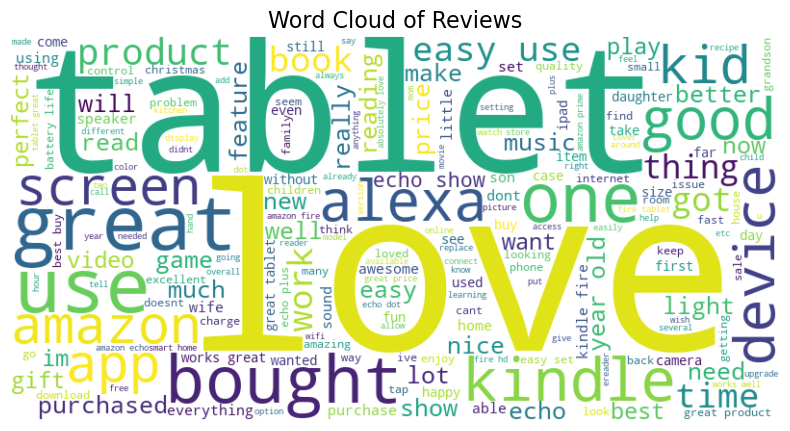

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned reviews
text_data = ' '.join(data['cleaned_reviews'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews', fontsize=16)
plt.show()


4. N-Gram Frequency Plot
Count and visualize the most common unigrams, bigrams, or trigrams.

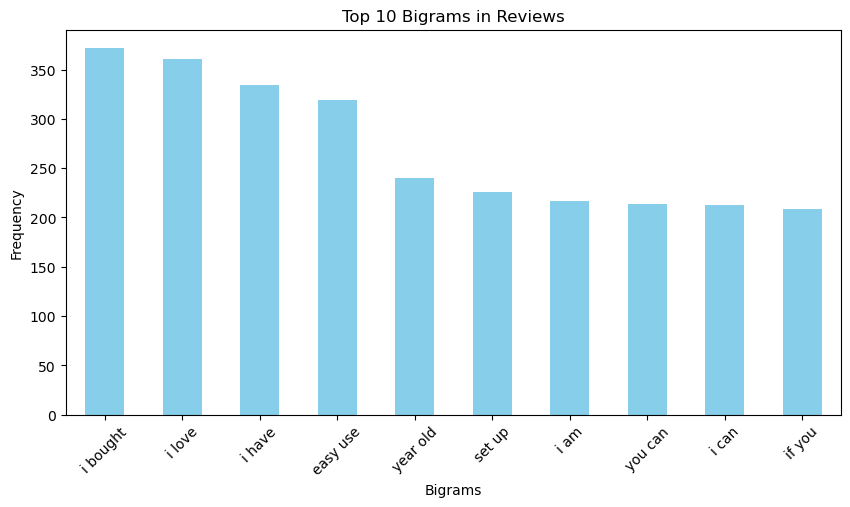

In [11]:
from collections import Counter

def get_ngrams(text, n=1):
    words = text.split()
    ngrams = zip(*[words[i:] for i in range(n)])
    return [' '.join(ngram) for ngram in ngrams]

# Extract unigrams, bigrams, or trigrams
unigrams = Counter([word for review in data['cleaned_reviews'] for word in get_ngrams(review, 1)])
bigrams = Counter([ngram for review in data['cleaned_reviews'] for ngram in get_ngrams(review, 2)])

# Plot most common bigrams
bigram_counts = bigrams.most_common(10)
bigram_df = pd.DataFrame(bigram_counts, columns=['Bigram', 'Frequency'])

bigram_df.plot(kind='bar', x='Bigram', y='Frequency', legend=False, figsize=(10, 5), color='skyblue')
plt.title('Top 10 Bigrams in Reviews')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


5. Sentiment Analysis
If you have sentiment labels (like reviews.rating), analyze sentiment distribution.

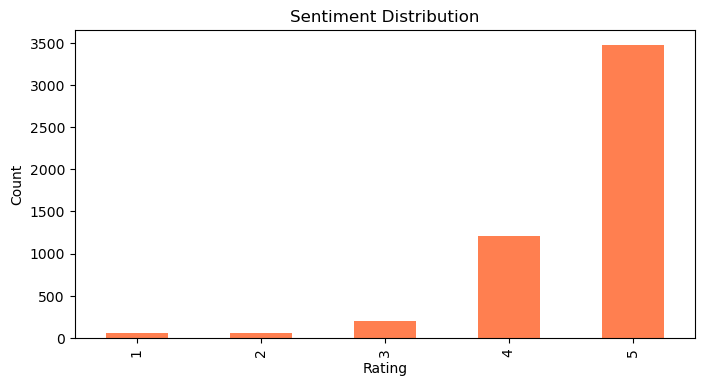

In [13]:
# Plot sentiment distribution
data['reviews.rating'].value_counts().sort_index().plot(kind='bar', color='coral', figsize=(8, 4))
plt.title('Sentiment Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


6. Text Vectorization
Convert text into numerical features using techniques like TF-IDF or Bag of Words.

Using TF-IDF:

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
tfidf = TfidfVectorizer(max_features=1000)  # Limit to top 1000 features

# Fit and transform the cleaned reviews
tfidf_matrix = tfidf.fit_transform(data['cleaned_reviews'])

# Convert to a DataFrame for inspection
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
print(tfidf_df.head())


   ability  able  about  absolutely  access  account  actually  add  added  \
0      0.0   0.0    0.0         0.0     0.0      0.0       0.0  0.0    0.0   
1      0.0   0.0    0.0         0.0     0.0      0.0       0.0  0.0    0.0   
2      0.0   0.0    0.0         0.0     0.0      0.0       0.0  0.0    0.0   
3      0.0   0.0    0.0         0.0     0.0      0.0       0.0  0.0    0.0   
4      0.0   0.0    0.0         0.0     0.0      0.0       0.0  0.0    0.0   

   adding  ...  years  yes  yet  you  youll  young  your  youre  youtube   yr  
0     0.0  ...    0.0  0.0  0.0  0.0    0.0    0.0   0.0    0.0      0.0  0.0  
1     0.0  ...    0.0  0.0  0.0  0.0    0.0    0.0   0.0    0.0      0.0  0.0  
2     0.0  ...    0.0  0.0  0.0  0.0    0.0    0.0   0.0    0.0      0.0  0.0  
3     0.0  ...    0.0  0.0  0.0  0.0    0.0    0.0   0.0    0.0      0.0  0.0  
4     0.0  ...    0.0  0.0  0.0  0.0    0.0    0.0   0.0    0.0      0.0  0.0  

[5 rows x 1000 columns]


7. Key Features for Modeling
Select features like:

TF-IDF vectors for textual representation.
reviews.rating as a target variable

In [17]:
# Features and target
X = tfidf_matrix
y = data['reviews.rating']  # Use this for supervised tasks like classification


Insights Example:

In [19]:
# Key terms in positive and negative reviews
positive_reviews = data[data['reviews.rating'] > 3]['cleaned_reviews']
negative_reviews = data[data['reviews.rating'] <= 3]['cleaned_reviews']

positive_words = ' '.join(positive_reviews)
negative_words = ' '.join(negative_reviews)

# Generate word clouds
WordCloud(background_color='white').generate(positive_words).to_image().show()
WordCloud(background_color='white').generate(negative_words).to_image().show()


Embeddings Example:

In [21]:
from gensim.models import Word2Vec

# Tokenize the cleaned reviews
tokenized_reviews = data['cleaned_reviews'].apply(lambda x: x.split())

# Train a Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=2, workers=4)

# Example: Get embedding for a word
print(w2v_model.wv['kindle'])


[-0.08867831  0.54720813  0.10536305  0.0034901   0.47710055 -0.7290704
  0.48446608  1.0646411  -0.34336632 -0.28193    -0.36318383 -0.7761637
 -0.25346994  0.3669422   0.16331662 -0.38501167 -0.12761441 -0.28738874
  0.01676203 -0.78077537  0.42998278  0.00506392 -0.08494488 -0.31916082
 -0.1810738   0.01871418 -0.37202117 -0.30176353 -0.5895549  -0.03369556
  0.7423663  -0.45113936  0.34940296 -0.30305043 -0.17149413  0.47695345
  0.36758575 -0.14230935  0.05802668 -0.7756159  -0.02225864 -0.57077074
 -0.34510252 -0.07689235  0.30404004 -0.13180807 -0.45437604 -0.21225516
  0.6642136   0.44789484  0.22154552 -0.5521067   0.47987252  0.1609618
 -0.03134537  0.18384717  0.25318846 -0.37415928 -0.2986058   0.06306819
  0.14170818  0.39270028  0.06478314 -0.25569406 -0.5089997   0.5497144
  0.13622877  0.4241667  -0.62211645  0.39642662 -0.42612216  0.07130647
  0.6274357  -0.17829686  0.32689252  0.00419437 -0.07991268  0.21519479
 -0.34619722 -0.04094657 -0.35914475  0.03649995 -0.371

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Assuming 'tokenized_reviews' is your list of tokenized reviews
# Assuming 'y' is your list of labels for sentiment (0 for negative, 1 for positive)

# Function to create average Word2Vec vectors for each review
def get_avg_word_vector(tokens, model, vector_size):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

In [25]:
# Generate feature vectors for the dataset
vector_size = w2v_model.vector_size
X_w2v = np.array([get_avg_word_vector(tokens, w2v_model, vector_size) for tokens in tokenized_reviews])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_w2v, y, test_size=0.2, random_state=42)


In [27]:
# Model 1: Logistic Regression
print("Logistic Regression Model Performance")
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Model Performance
Accuracy: 0.70

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        39
           4       0.50      0.00      0.01       234
           5       0.70      1.00      0.82       703

    accuracy                           0.70      1000
   macro avg       0.24      0.20      0.17      1000
weighted avg       0.61      0.70      0.58      1000


Confusion Matrix:
 [[  0   0   0   0   8]
 [  0   0   0   0  16]
 [  0   0   0   0  39]
 [  0   0   0   1 233]
 [  2   0   0   1 700]]


C:\Users\manik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
# Model 2: Random Forest
print("\nRandom Forest Model Performance")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Model Performance
Accuracy: 0.76

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.25      0.40         8
           2       1.00      0.31      0.48        16
           3       1.00      0.23      0.38        39
           4       0.67      0.28      0.39       234
           5       0.76      0.96      0.85       703

    accuracy                           0.76      1000
   macro avg       0.89      0.41      0.50      1000
weighted avg       0.76      0.76      0.72      1000


Confusion Matrix:
 [[  2   0   0   1   5]
 [  0   5   0   5   6]
 [  0   0   9   1  29]
 [  0   0   0  65 169]
 [  0   0   0  25 678]]


In [31]:
# Model 3: Support Vector Machine (SVM)
print("\nSVM Model Performance")
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Model Performance
Accuracy: 0.70

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        39
           4       0.00      0.00      0.00       234
           5       0.70      1.00      0.83       703

    accuracy                           0.70      1000
   macro avg       0.14      0.20      0.17      1000
weighted avg       0.49      0.70      0.58      1000


Confusion Matrix:
 [[  0   0   0   0   8]
 [  0   0   0   0  16]
 [  0   0   0   0  39]
 [  0   0   0   0 234]
 [  0   0   0   0 703]]


C:\Users\manik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
